In [ ]:
# JD: -10 for incorrect handling of originaL_size in compression_ratio

In [5]:
#!pip install scipy

In [6]:
#!pip install Pillow

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.linalg import svd

Shape of image_gray: (553, 768)


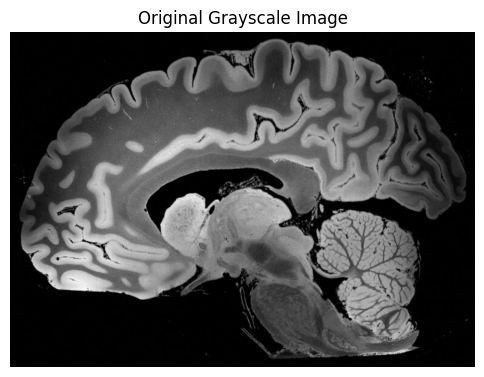

In [8]:
# Step 1: Load, normalize, and display the grayscale image
image_path = 'brain.jpg'  # Replace with your local image path if necessary
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_gray = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]

# Print shape of the grayscale image
print("Shape of image_gray:", image_gray.shape)

# Display
plt.figure(figsize=(6, 6))
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

In [9]:
# Step 2: Perform Singular Value Decomposition (SVD)
U, Sigma, Vt = svd(image_gray, full_matrices=False)
Sigma_matrix = np.diag(Sigma)

# Print the shape of the decomposed matrices
print(f"Shape of U: {U.shape}")
print(f"Shape of Sigma: {Sigma_matrix.shape}")
print(f"Shape of Vt: {Vt.shape}")

Shape of U: (553, 553)
Shape of Sigma: (553, 553)
Shape of Vt: (553, 768)


In [10]:
def compress_image(U, Sigma_matrix, Vt, k):
    """
    Reconstruct the image using the top k singular values.
    :param U: the left singular vectors
    :param Sigma_matrix: the diagonal matrix of singular values
    :param Vt: the right singular vectors
    :param k: the number of singular values to keep in the compressed image
    :return: The compressed image (a 2D numpy array)
    """
    # Truncate U, Sigma, and Vt to the top k components
    U_k = U[:, :k]
    Sigma_k = Sigma_matrix[:k, :k]
    Vt_k = Vt[:k, :]

    # Reconstruct the image using the top k components
    compressed_image = U_k @ Sigma_k @ Vt_k
    return compressed_image

In [11]:
# Step 4: Define k_values for compression
k_values = [5, 20, 50, 100]  # Values of k to compress the image with

In [12]:
# Initialize the list to store compressed images
compressed_images = []

# Compress the image with different values of k
for k in k_values:
    compressed_image = compress_image(U, Sigma_matrix, Vt, k)
    compressed_images.append(compressed_image)

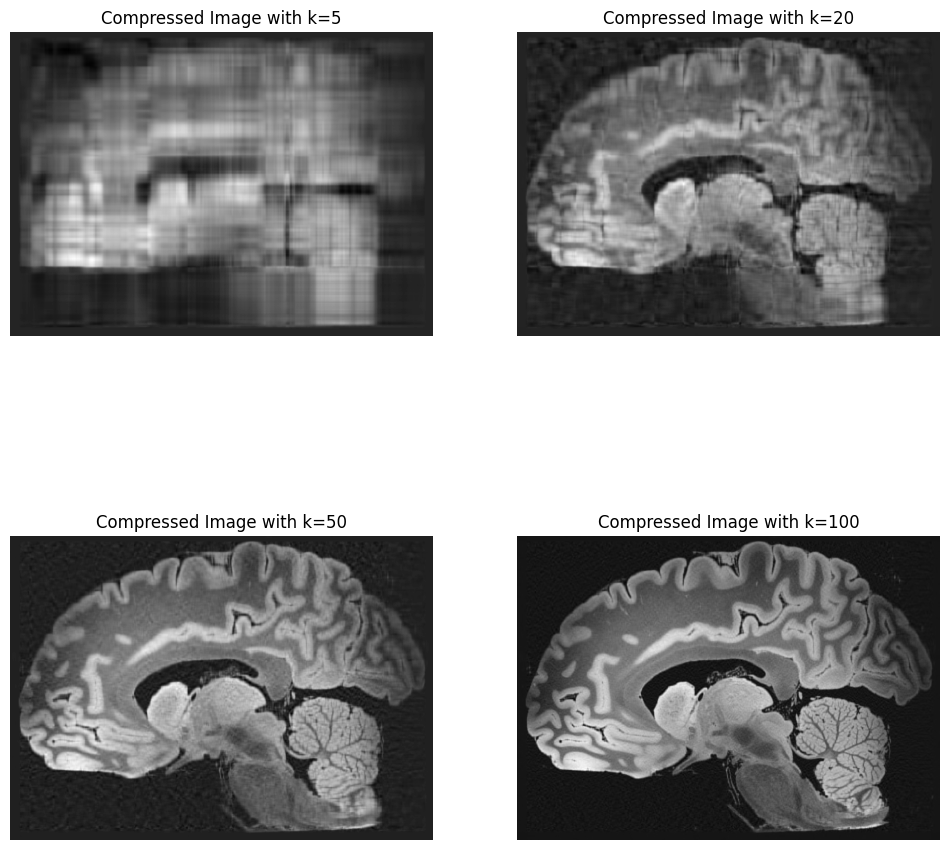

In [13]:
# Step 5 (Done for you) 
# Display the compressed images
# The code below should not be modified!
plt.figure(figsize=(12, 12))
for i, k in enumerate(k_values):
    plt.subplot(2, 2, i + 1)
    plt.imshow(compressed_images[i], cmap='gray')
    plt.title(f"Compressed Image with k={k}")
    plt.axis('off')
plt.show()

In [14]:
def compression_ratio(k, original_size):
    """
    Calculate the compression ratio as the fraction of the number of stored values.
    :param k: the number of singular values to keep in the compressed image
    :param original_size: the number of pixels in the original image
    :return: 
    """
    # Calculate the number of values stored in the compressed image
    compressed_size = k * (U.shape[0] + Vt.shape[0])  # k singular values stored in U and Vt
    return original_size / compressed_size  # Return the ratio
def reconstruction_error(original, compressed):
    """
    Calculate the reconstruction error as the Frobenius norm of the difference between the original and compressed image.
    Normalize the ratio by the Frobenius norm of the original image.
    Multiply by 100 to get the percentage error.
    :param original: the original image
    :param compressed: the compressed image
    :return: 
    """
    # Calculate the Frobenius norm of the difference between the original and compressed image
    error_norm = np.linalg.norm(original - compressed, 'fro')
    
    # Calculate the Frobenius norm of the original image
    original_norm = np.linalg.norm(original, 'fro')
    
    # Calculate the percentage error
    percent_error = 100 * (error_norm / original_norm)
    return percent_error

In [15]:
def reconstruction_error(original, compressed):
    """
    Calculate the reconstruction error as the Frobenius norm of the difference between the original and compressed image.
    Normalize by the Frobenius norm of the original image and multiply by 100.
    """
    frob_norm_diff = np.linalg.norm(original - compressed, 'fro')
    frob_norm_orig = np.linalg.norm(original, 'fro')
    percent_error = 100 * (frob_norm_diff / frob_norm_orig)
    return percent_error

In [16]:
# Step 7
# Print the compression ratio and reconstruction error for different values of k
# The code in this cell should not be modified!

# Compute original size (number of pixels)
original_size = image_gray.size

ratios = []
errors = []
for i, k in enumerate(k_values):
    ratio = compression_ratio(k, original_size)
    error = reconstruction_error(image_gray, compressed_images[i])
    ratios.append(ratio)
    errors.append(error)
    print(f"For k={k}, Compression Ratio: {ratio:.2f}, Reconstruction Error: {error:.2f}%")

For k=5, Compression Ratio: 76.80, Reconstruction Error: 31.22%
For k=20, Compression Ratio: 19.20, Reconstruction Error: 18.57%
For k=50, Compression Ratio: 7.68, Reconstruction Error: 10.57%
For k=100, Compression Ratio: 3.84, Reconstruction Error: 5.89%


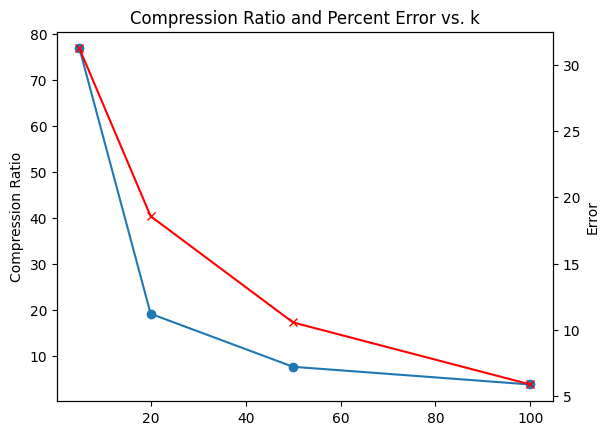

In [17]:
## Step 8
# Plot the compression ratio and reconstruction error
plt.plot(k_values, ratios, marker='o')
plt.ylabel('Compression Ratio')
plt.twinx()
plt.plot(k_values, errors, marker='x', color='r')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Compression Ratio and Percent Error vs. k')
plt.show()